#### Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Mini-Project 1 : Closed and Open Orbits in Modified Gravity

### Part 1: Earth-Sun system with standard LF

For a given accelleration $\vec a(\vec q)$, the position-verlet LF integrator does :

$$
\vec q_{t+\Delta t/2} = \vec q_{t} + \vec p_t \Delta t/2 \\
\vec p_{t+\Delta t} = \vec p_{t} + \vec a(\vec q_{t+\Delta t/2})\Delta t\\
\vec q_{t} = \vec q_{t+\Delta t/2} + \vec p_{t+\Delta t} \Delta t/2 
$$

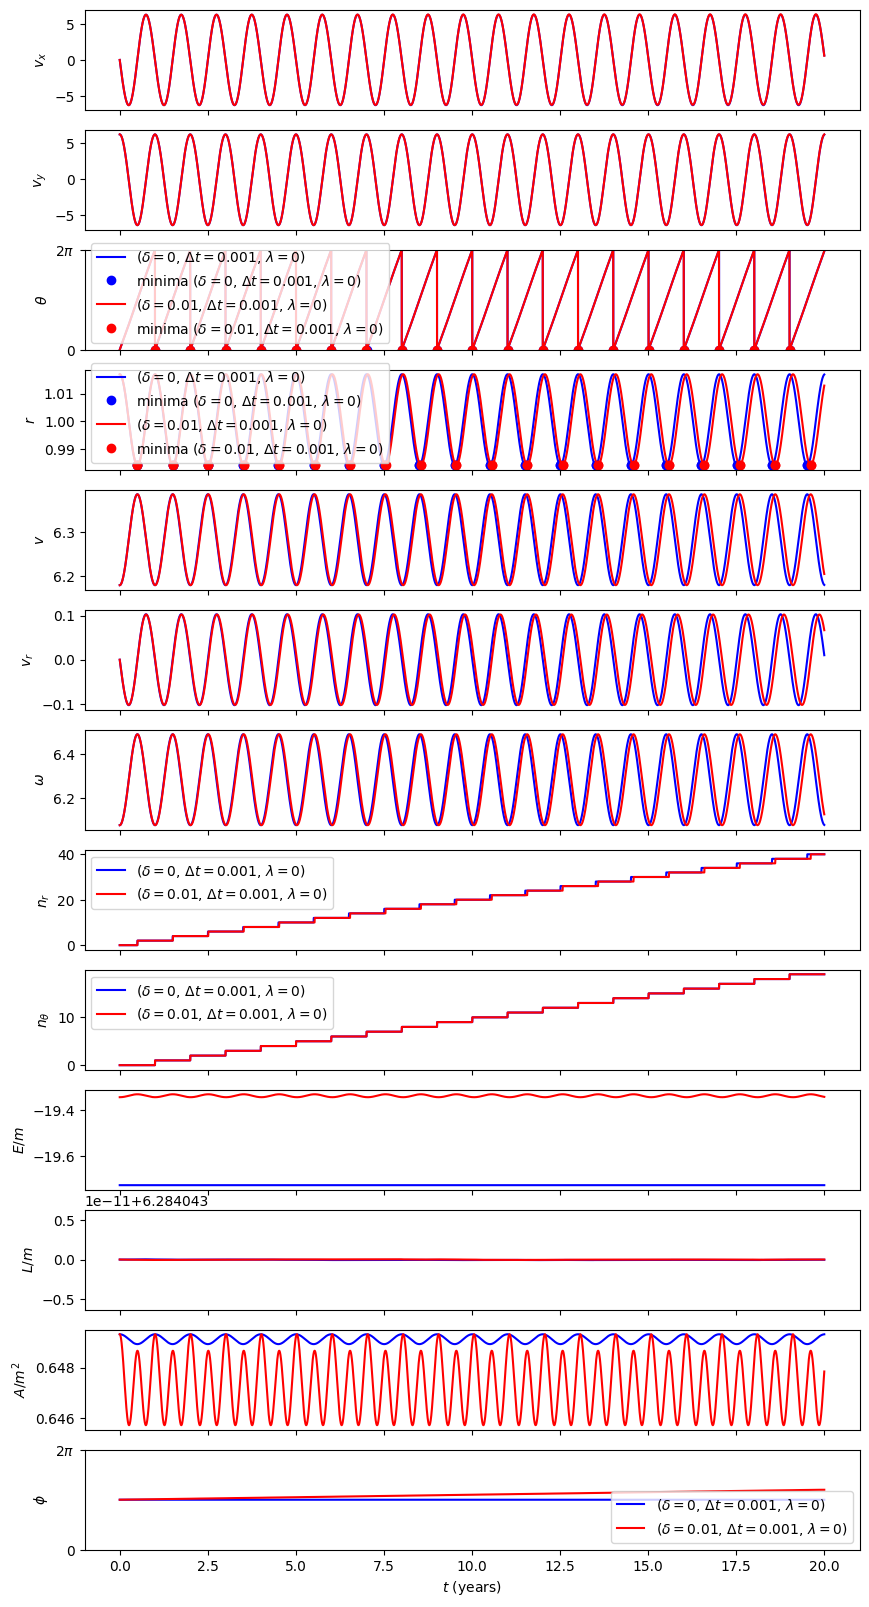

In [62]:
def LF_step(q,p,a,dt,i,**kwargs):
    q_mid = q[i] + p[i]*dt/2
    p[i+1] = p[i] + a(q_mid,**kwargs)*dt
    q[i+1] = q_mid + p[i+1]*dt/2

GM_s = 4*(np.pi**2) # the GM values for sun in AU^3 year^-2

def gravity(r,GM=GM_s,delta=0,lamb=0):
    if lamb == 0: return - GM*r/(np.linalg.norm(r)**(3+delta))
    else: 
        r_mag = np.linalg.norm(r)
        return -GM*r*(r_mag**-(3+delta) + lamb*r_mag**-(5+delta))

def Orbit(
    GM=GM_s,
    r_init=np.array([1.017, 0.0]),
    v_init=np.array([0.0,6.179]),
    dts = [0.001],
    deltas =[0,0.01],
    lambs = [0],
    T_max = 50, # years
    a = gravity,
    vis=False
    ):
    if vis:
        fig = plt.figure(figsize=(10,20))
        AX = fig.subplots(13,1,sharex=True)
        colors = ["blue","red","green","black","purple","yellow","brown"][::-1]

    for delta in deltas:
        for dt in dts:
            for lamb in lambs:
                c = colors.pop()
                t = np.arange(0,T_max+dt/2,dt)
                r = np.zeros((t.shape[0],2))
                v = np.zeros((t.shape[0],2))
                r[0] = r_init
                v[0] = v_init
                for i in range(t.shape[0]-1):
                    LF_step(r,v,gravity,dt,i,lamb=lamb,delta=delta)
                x = r[:,0]
                y = r[:,1]
                v_x = v[:,0]
                v_y = v[:,1]
                theta = np.arctan2(y,x)
                theta = theta + 2*np.pi*(theta <  0)
                r = (x**2 + y**2)**0.5
                v = (v_x**2 + v_y**2)**0.5
                E = 0.5*v**2 - GM/(r*(1+delta))
                L = x*v_y - y*v_x
                A_x,A_y = [L*v_y -GM*x/r,-L*v_x -GM*y/r]
                A = (A_x**2 + A_y**2)**0.5
                phi = np.arctan2(A_y,A_x)
                phi = 2*np.pi*(phi < 0) + phi
                v_r = (x*v_x + y*v_y)/r
                v_theta = (-y*v_x + x*v_y)/r
                omega = v_theta/r
                a = ((2/r) - ((v**2)/GM))**-1
                T = 2*np.pi*((a**3)/GM)**0.5 
                r_prev = np.concatenate((r[:1],r[:1],r[:-2]))
                r_next = np.concatenate((r[2:],r[-1:],r[-1:]))
                i_r = np.flatnonzero((r < r_prev) & (r <= r_next))
                theta_prev = np.concatenate((theta[:1],theta[:-1]))
                theta_next = np.concatenate((theta[1:],theta[-1:]))
                i_theta = np.flatnonzero((theta < theta_prev) & (theta <= theta_next))
                n_r = np.zeros_like(t,dtype=int)
                for i in i_r :
                    n_r = n_r + (np.arange(t.shape[0]) >= i)
                n_theta = np.zeros_like(t,dtype=int)
                for i in i_theta :
                    n_theta = n_theta + (np.arange(t.shape[0]) >= i)
                if not vis:continue
                cond = (
                    r"($\delta={" + str(delta)+ 
                    r"}$, $\Delta t=" + str(dt) + 
                    r"$, $\lambda=" + str(lamb)+"$)")
                AX[0].plot(t,v_x,label=cond,color=c) 
                AX[1].plot(t,v_y,label=cond,color=c)
                AX[2].plot(t,theta,label=cond,color=c)
                AX[2].plot(t[i_theta],theta[i_theta],'o',label="minima " + cond,color=c)
                AX[3].plot(t,r,label=cond,color=c)
                AX[3].plot(t[i_r],r[i_r],'o',label="minima " + cond,color=c)
                AX[4].plot(t,v,label=cond,color=c)
                AX[5].plot(t,v_r,label=cond,color=c)
                AX[6].plot(t,omega,label=cond,color=c)
                AX[7].plot(t,n_r,label=cond,color=c)
                AX[8].plot(t,n_theta,label=cond,color=c)
                AX[9].plot(t,E,label=cond,color=c)
                AX[10].plot(t,L,label=cond,color=c)
                AX[11].plot(t,A,label=cond,color=c)
                AX[12].plot(t,phi,label=cond,color=c)


    if vis:
        AX[2].set_ylim(0,2*np.pi)
        AX[2].set_yticks([0,2*np.pi],[0,r"$2\pi$"])
        AX[2].legend()
        AX[3].legend()
        AX[7].legend()
        AX[8].legend()
        AX[12].set_ylim(0,2*np.pi)
        AX[12].set_yticks([0,2*np.pi],[0,r"$2\pi$"])
        ylabels = ["v_x","v_y",r"\theta","r","v","v_r",r"\omega",r"n_r",r"n_\theta",r"E/m",r"L/m",r"A/m^2",r"\phi"]
        for ax,lbl in zip(AX,ylabels): 
            ax.set_ylabel("$" + lbl + "$")
            # ax.legend()

        AX[12].set_xlabel("$t$ (years)")
        AX[12].legend()

            # AX[0].plot(x,y,label=cond)
            # AX[0].plot(x[-1],y[-1],label=cond)


            

Orbit(vis=True,T_max=20,deltas=[0,0.01])
plt.show()